In [1]:
!nvidia-smi

Tue Nov 25 23:18:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.80                 Driver Version: 581.80         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce MX250         WDDM  |   00000000:06:00.0 Off |                  N/A |
| N/A   56C    P8            N/A  / 5001W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import pandas as pd
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


This dataset contains dekadal rainfall indicators, computed from Climate Hazards Group InfraRed Precipitation satellite imagery with insitu Station data (CHIRPS) version 2 and the CHIRPS-GEFS short term rainfall forecasts, aggregated by subnational administrative units.

Included indicators are (for each dekad):


10 day rainfall [mm] (rfh)

rainfall 1-month rolling aggregation [mm] (r1h)

rainfall 3-month rolling aggregation [mm] (r3h)

rainfall long term average [mm] (rfh_avg)

rainfall 1-month rolling aggregation long term average [mm] (r1h_avg)

rainfall 3-month rolling aggregation long term average [mm] (r3h_avg)

rainfall anomaly [%] (rfq)

rainfall 1-month anomaly [%] (r1q)

rainfall 3-month anomaly [%] (r3q)


The administrative units used for aggregation are based on WFP data and contain a Pcode reference attributed to each unit. The number of input pixels used to create the aggregates, is provided in the n_pixels column. 

Finally, the type column indicates if the value is based on a forecast, a preliminary or a final product.

Forecasts are issued on the 6th, 16th, and 26th of each month for the upcoming 10-day period (dekad), then updated with improved versions on the 1st, 11th, and 21st. Preliminary observations replace the previous dekad’s forecast on the 3rd, 13th, and 23rd, and are later replaced by final observations—published mid-month (13th or 23rd)—covering all three dekads of the prior month. Please find a summary below:

Publication Day: Forecast type, Covers (Dekad)

1st: Updated forecast, 1–10 of the same month
6th: Initial forecast, 11–20 of the same month
11th: Updated forecast, 1–10 of the same month
16th: Initial forecast, 21–end of the same month
21st: Updated forecast, 11–20 of the same month
26th: Initial forecast, 1–10 of the following month
For more on CHIRPS-GEFS forecasts, see: https://www.chc.ucsb.edu/data/chirps-gefs

In [3]:
rainfall_data = pd.read_csv('gha-rainfall-subnat-full.csv')
rainfall_data

,date,adm_level,adm_id,PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,1981-01-01,1,900854,GH02,798.0,1.269424,3.642774,NaN,NaN,NaN,NaN,72.539480,NaN,NaN,final
1,1981-01-11,1,900854,GH02,798.0,1.101504,2.760902,NaN,NaN,NaN,NaN,78.618484,NaN,NaN,final
2,1981-01-21,1,900854,GH02,798.0,2.075188,6.756349,4.446116,13.160025,NaN,NaN,60.181843,52.015984,NaN,final
3,1981-02-01,1,900854,GH02,798.0,4.845865,12.038555,8.022556,21.555805,NaN,NaN,57.785797,49.038456,NaN,final
4,1981-02-11,1,900854,GH02,798.0,22.137844,19.411488,29.058897,38.206390,NaN,NaN,111.168335,78.828384,NaN,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363595,2025-10-01,2,1009550,GH1003,26.0,50.115383,59.670513,348.730770,224.333330,497.69230,598.58466,85.224900,154.243070,83.28447,prelim
363596,2025-10-11,2,1009550,GH1003,26.0,95.615390,63.196150,290.653870,207.865390,584.00000,596.26666,147.538220,138.892410,97.95986,prelim
363597,2025-10-21,2,1009550,GH1003,26.0,51.384617,59.833332,197.115390,182.700000,616.30774,598.91030,86.968570,107.680010,102.88080,prelim
363598,2025-11-01,2,1009550,GH1003,26.0,19.615385,18.002563,166.615390,141.032040,568.53845,572.74100,107.011480,117.519000,99.27258,prelim


In [4]:
rainfall_data.describe()

,adm_level,adm_id,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q
count,363600.000000,3.636000e+05,363600.000000,363600.000000,363600.000000,363150.000000,363150.000000,361800.000000,361800.000000,363600.000000,363150.000000,361800.000000
mean,1.955556,1.004616e+06,67.364444,33.961041,33.823470,101.973188,101.561024,305.944517,304.976436,100.246441,99.983674,100.027890
std,0.206081,2.237705e+04,196.801311,31.523159,23.749755,79.388023,67.988271,183.788931,165.330834,49.150579,39.099501,27.132520
min,1.000000,9.008540e+05,1.000000,0.000000,0.000000,0.000000,0.000000,1.953125,2.716667,10.692328,9.981710,14.012669
25%,2.000000,1.009381e+06,13.000000,7.444445,12.730000,32.184859,40.331577,154.726695,164.171430,67.313383,74.518105,82.725884
50%,2.000000,1.009437e+06,25.000000,26.500000,32.744446,91.458690,99.209526,301.646100,326.816650,93.264244,95.990746,98.408743
75%,2.000000,1.009493e+06,45.000000,51.811458,52.263263,155.636350,153.856060,440.444460,428.834930,121.412657,118.766995,114.551850
max,2.000000,1.009550e+06,2257.000000,343.045440,153.189390,730.388900,391.623470,1250.272700,843.847000,617.151370,574.795800,410.343750


In [5]:
rainfall_data['version'].value_counts()

version
final       362475
prelim         900
forecast       225
Name: count, dtype: int64

In [6]:
rainfall_data['date']

0         1981-01-01
1         1981-01-11
2         1981-01-21
3         1981-02-01
4         1981-02-11
             ...    
363595    2025-10-01
363596    2025-10-11
363597    2025-10-21
363598    2025-11-01
363599    2025-11-11
Name: date, Length: 363600, dtype: object

In [7]:
pcode = pd.read_excel('PCODE_GHA.xlsx')
pcode

,Location,Admin Level,PCODE,Name,Parent P-Code,Municipality
0,GHA,1,GH01,Ahafo,GHA,Ghana
1,GHA,1,GH02,Ashanti,GHA,Ghana
2,GHA,1,GH03,Bono,GHA,Ghana
3,GHA,1,GH04,Bono East,GHA,Ghana
4,GHA,1,GH05,Central,GHA,Ghana
...,...,...,...,...,...,...
271,GHA,2,GH1605,Bodi,GH16,Western North
272,GHA,2,GH1606,Juaboso,GH16,Western North
273,GHA,2,GH1607,Sefwi Akontombra,GH16,Western North
274,GHA,2,GH1608,Sefwi-Wiawso,GH16,Western North


In [8]:
# # Extract all values where Location == 'GHA'
# pcode_gha = pcode[pcode['Location'] == 'GHA']
# pcode_gha

merged_df = pd.merge(rainfall_data, pcode[['PCODE', 'Name', 'Municipality']], left_on='PCODE',  right_on='PCODE',  how='left')
            
merged_df

,date,adm_level,adm_id,PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version,Name,Municipality
0,1981-01-01,1,900854,GH02,798.0,1.269424,3.642774,NaN,NaN,NaN,NaN,72.539480,NaN,NaN,final,Ashanti,Ghana
1,1981-01-11,1,900854,GH02,798.0,1.101504,2.760902,NaN,NaN,NaN,NaN,78.618484,NaN,NaN,final,Ashanti,Ghana
2,1981-01-21,1,900854,GH02,798.0,2.075188,6.756349,4.446116,13.160025,NaN,NaN,60.181843,52.015984,NaN,final,Ashanti,Ghana
3,1981-02-01,1,900854,GH02,798.0,4.845865,12.038555,8.022556,21.555805,NaN,NaN,57.785797,49.038456,NaN,final,Ashanti,Ghana
4,1981-02-11,1,900854,GH02,798.0,22.137844,19.411488,29.058897,38.206390,NaN,NaN,111.168335,78.828384,NaN,final,Ashanti,Ghana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363595,2025-10-01,2,1009550,GH1003,26.0,50.115383,59.670513,348.730770,224.333330,497.69230,598.58466,85.224900,154.243070,83.28447,prelim,Kadjebi,Oti
363596,2025-10-11,2,1009550,GH1003,26.0,95.615390,63.196150,290.653870,207.865390,584.00000,596.26666,147.538220,138.892410,97.95986,prelim,Kadjebi,Oti
363597,2025-10-21,2,1009550,GH1003,26.0,51.384617,59.833332,197.115390,182.700000,616.30774,598.91030,86.968570,107.680010,102.88080,prelim,Kadjebi,Oti
363598,2025-11-01,2,1009550,GH1003,26.0,19.615385,18.002563,166.615390,141.032040,568.53845,572.74100,107.011480,117.519000,99.27258,prelim,Kadjebi,Oti


In [9]:
merged_df.columns

Index(['date', 'adm_level', 'adm_id', 'PCODE', 'n_pixels', 'rfh', 'rfh_avg',
       'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q', 'version',
       'Name', 'Municipality'],
      dtype='object')

In [10]:
new_order = ['date', 'adm_level', 'adm_id', 'PCODE',
       'Name', 'Municipality', 'n_pixels', 'rfh', 'rfh_avg',
       'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q', 'version']
rainfall_data = merged_df[new_order]
rainfall_data

,date,adm_level,adm_id,PCODE,Name,Municipality,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,1981-01-01,1,900854,GH02,Ashanti,Ghana,798.0,1.269424,3.642774,NaN,NaN,NaN,NaN,72.539480,NaN,NaN,final
1,1981-01-11,1,900854,GH02,Ashanti,Ghana,798.0,1.101504,2.760902,NaN,NaN,NaN,NaN,78.618484,NaN,NaN,final
2,1981-01-21,1,900854,GH02,Ashanti,Ghana,798.0,2.075188,6.756349,4.446116,13.160025,NaN,NaN,60.181843,52.015984,NaN,final
3,1981-02-01,1,900854,GH02,Ashanti,Ghana,798.0,4.845865,12.038555,8.022556,21.555805,NaN,NaN,57.785797,49.038456,NaN,final
4,1981-02-11,1,900854,GH02,Ashanti,Ghana,798.0,22.137844,19.411488,29.058897,38.206390,NaN,NaN,111.168335,78.828384,NaN,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363595,2025-10-01,2,1009550,GH1003,Kadjebi,Oti,26.0,50.115383,59.670513,348.730770,224.333330,497.69230,598.58466,85.224900,154.243070,83.28447,prelim
363596,2025-10-11,2,1009550,GH1003,Kadjebi,Oti,26.0,95.615390,63.196150,290.653870,207.865390,584.00000,596.26666,147.538220,138.892410,97.95986,prelim
363597,2025-10-21,2,1009550,GH1003,Kadjebi,Oti,26.0,51.384617,59.833332,197.115390,182.700000,616.30774,598.91030,86.968570,107.680010,102.88080,prelim
363598,2025-11-01,2,1009550,GH1003,Kadjebi,Oti,26.0,19.615385,18.002563,166.615390,141.032040,568.53845,572.74100,107.011480,117.519000,99.27258,prelim


In [11]:
# # Extract all values where Subregion/Municipality == 'Greater Accra'

accra = rainfall_data[rainfall_data['Municipality'] == 'Greater Accra']
accra

,date,adm_level,adm_id,PCODE,Name,Municipality,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
16160,1981-01-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,2.500000,4.300000,NaN,NaN,NaN,NaN,80.645164,NaN,NaN,final
16161,1981-01-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,1.500000,2.733333,NaN,NaN,NaN,NaN,84.051720,NaN,NaN,final
16162,1981-01-21,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.500000,6.616667,9.50000,13.650000,NaN,NaN,90.387375,77.747986,NaN,final
16163,1981-02-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.000000,7.316667,12.00000,16.666666,NaN,NaN,81.190800,78.461540,NaN,final
16164,1981-02-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,15.000000,13.383333,25.50000,27.316668,NaN,NaN,108.794200,94.378550,NaN,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358747,2025-10-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,60.222220,30.788889,151.11111,91.211110,218.33334,200.08519,182.241550,162.258930,108.897840,prelim
358748,2025-10-11,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,56.666668,36.537037,168.44444,96.711110,268.11110,216.69260,148.461880,170.526540,123.193610,prelim
358749,2025-10-21,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,28.111110,34.707410,145.00000,102.033330,291.33334,231.81482,83.387740,140.143260,125.132940,prelim
358750,2025-11-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,37.000000,20.566666,121.77778,91.811110,310.44443,241.29259,164.276410,130.953750,128.077120,prelim


### Feature Engineering 
#### First for ML and then for Geospatial Data

##### Lagging Feature

In [12]:
# rainfall_data['rfh_lag_1'] = rainfall_data.groupby('PCODE')['rfh'].shift(1)
# rainfall_data['rfh_lag_3'] = rainfall_data.groupby('PCODE')['rfh'].shift(3)
# rainfall_data['r1q_lag_1'] = rainfall_data.groupby('PCODE')['r1q'].shift(1)

#IMPUTATION AND MISSING VALUE TREATMENT
## filled each with zero since past data was not available for the shifts
accra['rfh_lag_1'] = accra.groupby('PCODE')['rfh'].shift(1).fillna(0)
accra['rfh_lag_3'] = accra.groupby('PCODE')['rfh'].shift(3).fillna(0)
accra['r1q_lag_1'] = accra.groupby('PCODE')['r1q'].shift(1).fillna(0)


accra['rfh_lag_1'] = accra.groupby('PCODE')['rfh_lag_1'].fillna(0)
accra['rfh_lag_3'] = accra.groupby('PCODE')['rfh_lag_3'].fillna(0)
accra['r1q_lag_1'] = accra.groupby('PCODE')['r1q_lag_1'].fillna(0)
accra[['r1h', 'r1h_avg', 'r1q']] = accra.groupby('PCODE')[['r1h', 'r1h_avg', 'r1q']].fillna(0)

## These columns had a lot of NaNs so used the mean in these instances
accra[['r3h', 'r3h_avg', 'r3q']] = accra.groupby('PCODE')[['r3h', 'r3h_avg', 'r3q']].transform(lambda x: x.fillna(x.mean()))


C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\2874515207.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accra['rfh_lag_1'] = accra.groupby('PCODE')['rfh'].shift(1).fillna(0)
C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\2874515207.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accra['rfh_lag_3'] = accra.groupby('PCODE')['rfh'].shift(3).fillna(0)
C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\2874515207.py:9: SettingWithCopyWarning: 
A value is trying to be set

In [13]:
rainfall_acc = accra

In [14]:
rainfall_acc

,date,adm_level,adm_id,PCODE,Name,Municipality,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version,rfh_lag_1,rfh_lag_3,r1q_lag_1
16160,1981-01-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,2.500000,4.300000,0.00000,0.000000,228.504353,223.871092,80.645164,0.000000,101.917793,final,0.000000,0.000000,0.000000
16161,1981-01-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,1.500000,2.733333,0.00000,0.000000,228.504353,223.871092,84.051720,0.000000,101.917793,final,2.500000,0.000000,0.000000
16162,1981-01-21,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.500000,6.616667,9.50000,13.650000,228.504353,223.871092,90.387375,77.747986,101.917793,final,1.500000,0.000000,0.000000
16163,1981-02-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.000000,7.316667,12.00000,16.666666,228.504353,223.871092,81.190800,78.461540,101.917793,final,5.500000,2.500000,77.747986
16164,1981-02-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,15.000000,13.383333,25.50000,27.316668,228.504353,223.871092,108.794200,94.378550,101.917793,final,5.000000,1.500000,78.461540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358747,2025-10-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,60.222220,30.788889,151.11111,91.211110,218.333340,200.085190,182.241550,162.258930,108.897840,prelim,51.555557,12.666667,127.896324
358748,2025-10-11,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,56.666668,36.537037,168.44444,96.711110,268.111100,216.692600,148.461880,170.526540,123.193610,prelim,60.222220,39.333332,162.258930
358749,2025-10-21,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,28.111110,34.707410,145.00000,102.033330,291.333340,231.814820,83.387740,140.143260,125.132940,prelim,56.666668,51.555557,170.526540
358750,2025-11-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,37.000000,20.566666,121.77778,91.811110,310.444430,241.292590,164.276410,130.953750,128.077120,prelim,28.111110,60.222220,140.143260


In [15]:
# .groupby('Pcode')['rfh'].fillna(method='ffill').fillna(method='bfill')

### Additional feature engineering for seasonal and temporal features


In [16]:

# Ensure 'date' is in datetime format
rainfall_acc['date'] = pd.to_datetime(accra['date'])

# Extract month (1-12)
rainfall_acc['month'] = accra['date'].dt.month

# Assign dekad_of_month: 1 for 1-10, 2 for 11-20, 3 for 21+
def get_dekad(day):
    if day <= 10:
        return 1
    elif day <= 20:
        return 2
    else:
        return 3

rainfall_acc['dekad_of_month'] = rainfall_acc['date'].dt.day.apply(get_dekad)

# Binary flag for rainy season (May to October: 5-10)
rainfall_acc['is_rainy_season'] = rainfall_acc['month'].apply(lambda m: 1 if 5 <= m <= 10 else 0)

# Sine and Cosine transformations for month
rainfall_acc['sin_month'] = np.sin(2 * np.pi * rainfall_acc['month'] / 12)
rainfall_acc['cos_month'] = np.cos(2 * np.pi * rainfall_acc['month'] / 12)

rainfall_acc


C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\1588859702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_acc['date'] = pd.to_datetime(accra['date'])
C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\1588859702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_acc['month'] = accra['date'].dt.month
C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\1588859702.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,date,adm_level,adm_id,PCODE,Name,Municipality,n_pixels,rfh,rfh_avg,r1h,...,r3q,version,rfh_lag_1,rfh_lag_3,r1q_lag_1,month,dekad_of_month,is_rainy_season,sin_month,cos_month
16160,1981-01-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,2.500000,4.300000,0.00000,...,101.917793,final,0.000000,0.000000,0.000000,1,1,0,0.500000,0.866025
16161,1981-01-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,1.500000,2.733333,0.00000,...,101.917793,final,2.500000,0.000000,0.000000,1,2,0,0.500000,0.866025
16162,1981-01-21,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.500000,6.616667,9.50000,...,101.917793,final,1.500000,0.000000,0.000000,1,3,0,0.500000,0.866025
16163,1981-02-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.000000,7.316667,12.00000,...,101.917793,final,5.500000,2.500000,77.747986,2,1,0,0.866025,0.500000
16164,1981-02-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,15.000000,13.383333,25.50000,...,101.917793,final,5.000000,1.500000,78.461540,2,2,0,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358747,2025-10-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,60.222220,30.788889,151.11111,...,108.897840,prelim,51.555557,12.666667,127.896324,10,1,1,-0.866025,0.500000
358748,2025-10-11,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,56.666668,36.537037,168.44444,...,123.193610,prelim,60.222220,39.333332,162.258930,10,2,1,-0.866025,0.500000
358749,2025-10-21,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,28.111110,34.707410,145.00000,...,125.132940,prelim,56.666668,51.555557,170.526540,10,3,1,-0.866025,0.500000
358750,2025-11-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,37.000000,20.566666,121.77778,...,128.077120,prelim,28.111110,60.222220,140.143260,11,1,0,-0.500000,0.866025


In [17]:
rainfall_acc['Name'].unique()

array(['Adenta Municipal', 'Ledzokuku Municipal', 'Ada East',
       'Shai Osudoku', 'Ada West', 'Ningo/Prampram', 'La Dade-Kotopon',
       'La-Nkwantanang-Madina', 'Ga East', 'Ayawaso West',
       'Ga South Municipal', 'Ga West Municipal', 'Ga Central Municipal',
       'Tema West Municipal', 'Kpone Katamanso'], dtype=object)

### Anomaly Threshold Flags

In [18]:
# Anomaly Threshold Flags
# Drought Flag: 1 if rfq < -50%, else 0
rainfall_acc['drought_flag'] = (rainfall_acc['rfq'] < -40).astype(int)

# High Rainfall Flag: 1 if rfq > 100%, else 0
rainfall_acc['high_rainfall_flag'] = (rainfall_acc['rfq'] > 100).astype(int)

# Long-Term Trend Features: 6-month and 12-month moving averages of r3h (3-month rolling aggregation)
# Assuming data is sorted by date and PCODE
rainfall_acc = rainfall_acc.sort_values(['PCODE', 'date'])

# 6-month moving average (approximately 18 dekads, but using rolling window on r3h)
rainfall_acc['r3h_6m_ma'] = rainfall_acc.groupby('PCODE')['r3h'].rolling(window=18, min_periods=1).mean().reset_index(0, drop=True).fillna(0)

# 12-month moving average (approximately 36 dekads)
rainfall_acc['r3h_12m_ma'] = rainfall_acc.groupby('PCODE')['r3h'].rolling(window=36, min_periods=1).mean().reset_index(0, drop=True).fillna(0)

# Rolling Volatility: to measure the instability of rainfall intensity over the recent past.
rainfall_acc['rfh_3d_std'] = rainfall_acc.groupby('PCODE')['rfh'].rolling(window=3, min_periods=1).std().reset_index(0, drop=True).fillna(0)

# Rate of Change: measures the difference (or momentum) between the current rainfall and the rainfall from the previous period.
rainfall_acc['rfh_rate_change'] = rainfall_acc['rfh'] - rainfall_acc['rfh_lag_1']

rainfall_acc


C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\2150897247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_acc['drought_flag'] = (rainfall_acc['rfq'] < -40).astype(int)
C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\2150897247.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_acc['high_rainfall_flag'] = (rainfall_acc['rfq'] > 100).astype(int)


,date,adm_level,adm_id,PCODE,Name,Municipality,n_pixels,rfh,rfh_avg,r1h,...,dekad_of_month,is_rainy_season,sin_month,cos_month,drought_flag,high_rainfall_flag,r3h_6m_ma,r3h_12m_ma,rfh_3d_std,rfh_rate_change
203616,1981-01-01,2,1009451,GH0705,Ada East,Greater Accra,7.0,2.857143,3.504762,0.000000,...,1,0,0.500000,0.866025,0,0,208.147033,208.147033,0.000000,2.857143
203617,1981-01-11,2,1009451,GH0705,Ada East,Greater Accra,7.0,2.285714,2.633333,0.000000,...,2,0,0.500000,0.866025,0,0,208.147033,208.147033,0.404061,-0.571429
203618,1981-01-21,2,1009451,GH0705,Ada East,Greater Accra,7.0,6.000000,5.171429,11.142858,...,3,0,0.500000,0.866025,0,1,208.147033,208.147033,2.000000,3.714286
203619,1981-02-01,2,1009451,GH0705,Ada East,Greater Accra,7.0,2.571429,3.576191,10.857142,...,1,0,0.866025,0.500000,0,0,208.147033,208.147033,2.066908,-3.428571
203620,1981-02-11,2,1009451,GH0705,Ada East,Greater Accra,7.0,7.285714,7.752381,15.857142,...,2,0,0.866025,0.500000,0,0,208.147033,208.147033,2.436960,4.714285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357131,2025-10-01,2,1009545,GH0728,Tema West Municipal,Greater Accra,4.0,57.500000,28.366667,130.250000,...,1,1,-0.866025,0.500000,0,1,282.500000,204.166667,12.273786,19.750000
357132,2025-10-11,2,1009545,GH0728,Tema West Municipal,Greater Accra,4.0,61.000000,33.058334,156.250000,...,2,1,-0.866025,0.500000,0,1,286.861111,206.743056,12.535782,3.500000
357133,2025-10-21,2,1009545,GH0728,Tema West Municipal,Greater Accra,4.0,23.000000,30.616667,141.500000,...,3,1,-0.866025,0.500000,0,0,288.708333,209.013889,21.001984,-38.000000
357134,2025-11-01,2,1009545,GH0728,Tema West Municipal,Greater Accra,4.0,26.250000,12.725000,110.250000,...,1,0,-0.500000,0.866025,0,1,289.888889,211.201389,21.063891,3.250000


In [19]:
rainfall_acc.columns

Index(['date', 'adm_level', 'adm_id', 'PCODE', 'Name', 'Municipality',
       'n_pixels', 'rfh', 'rfh_avg', 'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq',
       'r1q', 'r3q', 'version', 'rfh_lag_1', 'rfh_lag_3', 'r1q_lag_1', 'month',
       'dekad_of_month', 'is_rainy_season', 'sin_month', 'cos_month',
       'drought_flag', 'high_rainfall_flag', 'r3h_6m_ma', 'r3h_12m_ma',
       'rfh_3d_std', 'rfh_rate_change'],
      dtype='object')

In [20]:
# ### For Machine Learning 
# rainfall_acc.to_csv("Greater Accra Rainfall Processed Data (for Charles ML).csv")

rainfall_acc['high_rainfall_flag'].value_counts()


high_rainfall_flag
0    14377
1     9863
Name: count, dtype: int64

### For GeoSpatial Analysis

In [21]:
rain_acc = rainfall_data[rainfall_data['Municipality'] == 'Greater Accra']
rain_acc

,date,adm_level,adm_id,PCODE,Name,Municipality,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
16160,1981-01-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,2.500000,4.300000,NaN,NaN,NaN,NaN,80.645164,NaN,NaN,final
16161,1981-01-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,1.500000,2.733333,NaN,NaN,NaN,NaN,84.051720,NaN,NaN,final
16162,1981-01-21,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.500000,6.616667,9.50000,13.650000,NaN,NaN,90.387375,77.747986,NaN,final
16163,1981-02-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.000000,7.316667,12.00000,16.666666,NaN,NaN,81.190800,78.461540,NaN,final
16164,1981-02-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,15.000000,13.383333,25.50000,27.316668,NaN,NaN,108.794200,94.378550,NaN,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358747,2025-10-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,60.222220,30.788889,151.11111,91.211110,218.33334,200.08519,182.241550,162.258930,108.897840,prelim
358748,2025-10-11,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,56.666668,36.537037,168.44444,96.711110,268.11110,216.69260,148.461880,170.526540,123.193610,prelim
358749,2025-10-21,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,28.111110,34.707410,145.00000,102.033330,291.33334,231.81482,83.387740,140.143260,125.132940,prelim
358750,2025-11-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,37.000000,20.566666,121.77778,91.811110,310.44443,241.29259,164.276410,130.953750,128.077120,prelim


In [22]:
#Now for Prince's work
from scipy.stats import gamma, gumbel_r, norm

# Function to calculate SPI for a given time scale
def calculate_spi(rainfall_series, avg_series, scale=3):
    # Simplified SPI calculation: standardize the anomaly
    # Full SPI requires fitting to Gamma distribution and transforming to normal
    anomaly = rainfall_series - avg_series
    std_dev = anomaly.std()
    if std_dev == 0:
        return pd.Series(0, index=rainfall_series.index)
    spi = anomaly / std_dev
    return spi


In [24]:

# Calculate SPI-3 for 3-month aggregation

rain_acc[['r1h', 'r1h_avg', 'r1q']] = rain_acc.groupby('PCODE')[['r1h', 'r1h_avg', 'r1q']].fillna(0)

## These columns had a lot of NaNs so used the mean in these instances
rain_acc[['r3h', 'r3h_avg', 'r3q']] = rain_acc.groupby('PCODE')[['r3h', 'r3h_avg', 'r3q']].transform(lambda x: x.fillna(x.mean()))


rain_acc['spi_3'] = rainfall_data.groupby('PCODE').apply(lambda x: calculate_spi(x['r3h'], x['r3h_avg'], scale=3),
                                                          include_groups=False).reset_index(level=0, drop=True).transform(lambda x: x.fillna(x.mean()))


# Calculate SPI-6 for 6-month aggregation (using r3h_6m_ma if available, else approximate)
if 'r3h_6m_ma' in rain_acc.columns:
    rain_acc['spi_6'] = rain_acc.groupby('PCODE').apply(lambda x: calculate_spi(x['r3h_6m_ma'], 
                                                x['r3h_avg'], scale=6), include_groups=False).reset_index(level=0, drop=True).transform(lambda x: x.fillna(x.mean()))
else:
    # Approximate SPI-6 using rolling mean
    rain_acc['r3h_6m_approx'] = rain_acc.groupby('PCODE')['r3h'].rolling(window=18, min_periods=1).mean().reset_index(0, drop=True).transform(lambda x: x.fillna(x.median()))
    rain_acc['spi_6'] = rain_acc.groupby('PCODE').apply(lambda x: calculate_spi(x['r3h_6m_approx'], 
                                                        x['r3h_avg'], scale=6), include_groups=False).reset_index(level=0, drop=True).transform(lambda x: x.fillna(x.mean()))


rain_acc

C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\952320702.py:3: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  rain_acc[['r1h', 'r1h_avg', 'r1q']] = rain_acc.groupby('PCODE')[['r1h', 'r1h_avg', 'r1q']].fillna(0)
C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\952320702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_acc[['r1h', 'r1h_avg', 'r1q']] = rain_acc.groupby('PCODE')[['r1h', 'r1h_avg', 'r1q']].fillna(0)
C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\952320702.py:6: SettingWithCopyWarning: 
A value is trying to

,date,adm_level,adm_id,PCODE,Name,Municipality,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version,spi_3,r3h_6m_approx,spi_6
16160,1981-01-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,2.500000,4.300000,0.00000,0.000000,228.504353,223.871092,80.645164,0.000000,101.917793,final,0.008693,228.504353,0.039856
16161,1981-01-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,1.500000,2.733333,0.00000,0.000000,228.504353,223.871092,84.051720,0.000000,101.917793,final,0.008693,228.504353,0.039856
16162,1981-01-21,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.500000,6.616667,9.50000,13.650000,228.504353,223.871092,90.387375,77.747986,101.917793,final,0.008693,228.504353,0.039856
16163,1981-02-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.000000,7.316667,12.00000,16.666666,228.504353,223.871092,81.190800,78.461540,101.917793,final,0.008693,228.504353,0.039856
16164,1981-02-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,15.000000,13.383333,25.50000,27.316668,228.504353,223.871092,108.794200,94.378550,101.917793,final,0.008693,228.504353,0.039856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358747,2025-10-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,60.222220,30.788889,151.11111,91.211110,218.333340,200.085190,182.241550,162.258930,108.897840,prelim,0.250002,329.228394,1.059350
358748,2025-10-11,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,56.666668,36.537037,168.44444,96.711110,268.111100,216.692600,148.461880,170.526540,123.193610,prelim,0.704439,331.302467,0.940134
358749,2025-10-21,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,28.111110,34.707410,145.00000,102.033330,291.333340,231.814820,83.387740,140.143260,125.132940,prelim,0.815410,331.197529,0.815227
358750,2025-11-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,37.000000,20.566666,121.77778,91.811110,310.444430,241.292590,164.276410,130.953750,128.077120,prelim,0.947388,331.197529,0.737482


In [25]:


# Function to calculate return period thresholds using Gumbel distribution
def calculate_return_period_thresholds(rainfall_series, periods=[2, 5, 10]):
    # Fit Gumbel distribution to the rainfall data
    params = gumbel_r.fit(rainfall_series.dropna())
    thresholds = {}
    for period in periods:
        # Return level for given return period
        # For Gumbel, return level R_T = u + a * ln(-ln(1-1/T))
        u, a = params
        thresholds[period] = u + a * np.log(-np.log(1 - 1/period))
    return thresholds

# Calculate return period thresholds for each PCODE
thresholds_df = rain_acc.groupby('PCODE')['rfh'].apply(calculate_return_period_thresholds).reset_index()
# thresholds_df

In [26]:
thresholds_df.columns = ['PCODE', "Year_Period", "rfh_threshold"]
thresholds_df.columns

Index(['PCODE', 'Year_Period', 'rfh_threshold'], dtype='object')

In [27]:
# merger = pd.merge(rain_acc, thresholds_df, left_on='PCODE',  right_on='PCODE',  how='left')            
# merger


# import pandas as pd
# import numpy as np
# from scipy.stats import gumbel_r

# Assuming rain_acc is already loaded and 'date' is datetime
rain_acc['date'] = pd.to_datetime(rain_acc['date'])
# Extract year from date
rain_acc['year'] = rain_acc['date'].dt.year

# Extract annual maxima: group by PCODE and year, take max rfh
annual_max = rain_acc.groupby(['PCODE', 'year'])['rfh'].max().reset_index()


C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\3126376107.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_acc['date'] = pd.to_datetime(rain_acc['date'])
C:\Users\BrothermanKNAN\AppData\Local\Temp\ipykernel_29668\3126376107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_acc['year'] = rain_acc['date'].dt.year


In [32]:

# Function to calculate return period thresholds using Gumbel distribution
def calculate_return_period_thresholds(rainfall_series, periods=[2, 5, 10]):
    rainfall_series = rainfall_series.dropna()
    if len(rainfall_series) < 2:
        # Not enough data to fit, return None or default
        return {period: np.nan for period in periods}
    # Fit Gumbel distribution to the rainfall data (now annual maxima)
    params = gumbel_r.fit(rainfall_series)
    thresholds = {}
    for period in periods:
        # Return level for given return period
        # For Gumbel, return level R_T = u + a * ln(-ln(1-1/T))
        u, a = params
        thresholds[period] = u + a * np.log(-np.log(1 - 1/period))
    return thresholds

# Calculate return period thresholds for each PCODE using annual maxima
thresholds_df = annual_max.groupby('PCODE')['rfh'].apply(calculate_return_period_thresholds).reset_index()
thresholds_df

,PCODE,level_1,rfh
0,GH0705,2,75.971545
1,GH0705,5,51.063864
2,GH0705,10,34.572812
3,GH0706,2,75.606185
4,GH0706,5,51.480232
5,GH0706,10,35.506752
6,GH0707,2,74.542886
7,GH0707,5,50.074008
8,GH0707,10,33.873481
9,GH0712,2,72.590749


In [33]:
# Extract the PCODES from the calculated values
pcodes = thresholds_df['PCODE'].unique()
pcodes = pd.DataFrame(pcodes.reshape(-1,1), columns = ["PCODE"])

# Expand the 'rfh' column (which contains dicts) into separate columns
expanded_thresholds = thresholds_df['rfh'].apply(pd.Series)
reshaped = np.array(expanded_thresholds).reshape(-1, 3)
expanded_threshold = pd.DataFrame(reshaped, columns = ['return_2yr', 'return_5yr', 'return_10yr'])


# Join back with PCODE
thresholds_df = pcodes[['PCODE']].join(expanded_threshold)
thresholds_df


,PCODE,return_2yr,return_5yr,return_10yr
0,GH0705,75.971545,51.063864,34.572812
1,GH0706,75.606185,51.480232,35.506752
2,GH0707,74.542886,50.074008,33.873481
3,GH0712,72.590749,46.280101,28.860163
4,GH0713,79.636808,52.438749,34.431267
5,GH0714,79.715057,53.418901,36.008557
6,GH0716,90.167399,60.657082,41.118684
7,GH0717,88.315847,60.614260,42.273399
8,GH0719,76.803624,51.922072,35.448319
9,GH0721,72.036538,45.722579,28.300449


In [34]:
rain_acc = rain_acc.merge(thresholds_df, on='PCODE', how='left')

In [35]:
rain_acc

,date,adm_level,adm_id,PCODE,Name,Municipality,n_pixels,rfh,rfh_avg,r1h,...,r1q,r3q,version,spi_3,r3h_6m_approx,spi_6,year,return_2yr,return_5yr,return_10yr
0,1981-01-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,2.500000,4.300000,0.00000,...,0.000000,101.917793,final,0.008693,228.504353,0.039856,1981,74.542886,50.074008,33.873481
1,1981-01-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,1.500000,2.733333,0.00000,...,0.000000,101.917793,final,0.008693,228.504353,0.039856,1981,74.542886,50.074008,33.873481
2,1981-01-21,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.500000,6.616667,9.50000,...,77.747986,101.917793,final,0.008693,228.504353,0.039856,1981,74.542886,50.074008,33.873481
3,1981-02-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.000000,7.316667,12.00000,...,78.461540,101.917793,final,0.008693,228.504353,0.039856,1981,74.542886,50.074008,33.873481
4,1981-02-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,15.000000,13.383333,25.50000,...,94.378550,101.917793,final,0.008693,228.504353,0.039856,1981,74.542886,50.074008,33.873481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24235,2025-10-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,60.222220,30.788889,151.11111,...,162.258930,108.897840,prelim,0.250002,329.228394,1.059350,2025,76.803624,51.922072,35.448319
24236,2025-10-11,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,56.666668,36.537037,168.44444,...,170.526540,123.193610,prelim,0.704439,331.302467,0.940134,2025,76.803624,51.922072,35.448319
24237,2025-10-21,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,28.111110,34.707410,145.00000,...,140.143260,125.132940,prelim,0.815410,331.197529,0.815227,2025,76.803624,51.922072,35.448319
24238,2025-11-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,37.000000,20.566666,121.77778,...,130.953750,128.077120,prelim,0.947388,331.197529,0.737482,2025,76.803624,51.922072,35.448319


In [36]:

# Create flags based on return periods (exceedance flags)
rain_acc['exceeds_2yr'] = (rain_acc['rfh'] > rain_acc['return_2yr']).astype(int)
rain_acc['exceeds_5yr'] = (rain_acc['rfh'] > rain_acc['return_5yr']).astype(int)
rain_acc['exceeds_10yr'] = (rain_acc['rfh'] > rain_acc['return_10yr']).astype(int)

rain_acc


,date,adm_level,adm_id,PCODE,Name,Municipality,n_pixels,rfh,rfh_avg,r1h,...,spi_3,r3h_6m_approx,spi_6,year,return_2yr,return_5yr,return_10yr,exceeds_2yr,exceeds_5yr,exceeds_10yr
0,1981-01-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,2.500000,4.300000,0.00000,...,0.008693,228.504353,0.039856,1981,74.542886,50.074008,33.873481,0,0,0
1,1981-01-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,1.500000,2.733333,0.00000,...,0.008693,228.504353,0.039856,1981,74.542886,50.074008,33.873481,0,0,0
2,1981-01-21,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.500000,6.616667,9.50000,...,0.008693,228.504353,0.039856,1981,74.542886,50.074008,33.873481,0,0,0
3,1981-02-01,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,5.000000,7.316667,12.00000,...,0.008693,228.504353,0.039856,1981,74.542886,50.074008,33.873481,0,0,0
4,1981-02-11,2,1009335,GH0707,Adenta Municipal,Greater Accra,2.0,15.000000,13.383333,25.50000,...,0.008693,228.504353,0.039856,1981,74.542886,50.074008,33.873481,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24235,2025-10-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,60.222220,30.788889,151.11111,...,0.250002,329.228394,1.059350,2025,76.803624,51.922072,35.448319,0,1,1
24236,2025-10-11,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,56.666668,36.537037,168.44444,...,0.704439,331.302467,0.940134,2025,76.803624,51.922072,35.448319,0,1,1
24237,2025-10-21,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,28.111110,34.707410,145.00000,...,0.815410,331.197529,0.815227,2025,76.803624,51.922072,35.448319,0,0,0
24238,2025-11-01,2,1009547,GH0719,Kpone Katamanso,Greater Accra,9.0,37.000000,20.566666,121.77778,...,0.947388,331.197529,0.737482,2025,76.803624,51.922072,35.448319,0,0,1


In [55]:
monthly_agg

,PCODE,date,monthly_total_rfh,monthly_max_rfh,num_wet_dekads,monthly_mean_rfq
0,GH0705,1981-01-01,11.142857,6.000000,3,98.659110
1,GH0705,1981-02-01,15.857142,7.285714,3,90.819177
2,GH0705,1981-03-01,82.142857,39.857143,3,116.179862
3,GH0705,1981-04-01,130.714285,61.714287,3,119.899438
4,GH0705,1981-05-01,215.285715,112.142860,3,144.421538
...,...,...,...,...,...,...
8080,GH0728,2025-07-01,21.250000,10.500000,3,43.238356
8081,GH0728,2025-08-01,33.500000,14.750000,3,100.462607
8082,GH0728,2025-09-01,80.250000,37.750000,3,127.670660
8083,GH0728,2025-10-01,141.500000,61.000000,3,146.448515


In [54]:
# Ensure 'date' is datetime and set as index
rain_acc['date'] = pd.to_datetime(rain_acc['date'])
rain_acc.set_index('date', inplace=True)

# Define function to count wet dekads (rfh > 0)
def count_wet_dekads(x):
    return (x > 0).sum()

# Group by PCODE and resample monthly ('MS' = month start)
monthly_agg = rain_acc.groupby('PCODE').resample('MS').agg(
    monthly_total_rfh = ('rfh', 'sum'),
    monthly_max_rfh = ('rfh', 'max'),
    num_wet_dekads = ('rfh', count_wet_dekads),
    monthly_mean_rfq = ('rfq', 'mean'),  # use rfq or r1q
).reset_index()

print(monthly_agg.head())


KeyError: 'date'

In [37]:
thresholds_df

,PCODE,return_2yr,return_5yr,return_10yr
0,GH0705,75.971545,51.063864,34.572812
1,GH0706,75.606185,51.480232,35.506752
2,GH0707,74.542886,50.074008,33.873481
3,GH0712,72.590749,46.280101,28.860163
4,GH0713,79.636808,52.438749,34.431267
5,GH0714,79.715057,53.418901,36.008557
6,GH0716,90.167399,60.657082,41.118684
7,GH0717,88.315847,60.614260,42.273399
8,GH0719,76.803624,51.922072,35.448319
9,GH0721,72.036538,45.722579,28.300449


In [39]:
rain_acc.columns

Index(['date', 'adm_level', 'adm_id', 'PCODE', 'Name', 'Municipality',
       'n_pixels', 'rfh', 'rfh_avg', 'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq',
       'r1q', 'r3q', 'version', 'spi_3', 'r3h_6m_approx', 'spi_6', 'year',
       'return_2yr', 'return_5yr', 'return_10yr', 'exceeds_2yr', 'exceeds_5yr',
       'exceeds_10yr'],
      dtype='object')

## Data Visualisation for EDA

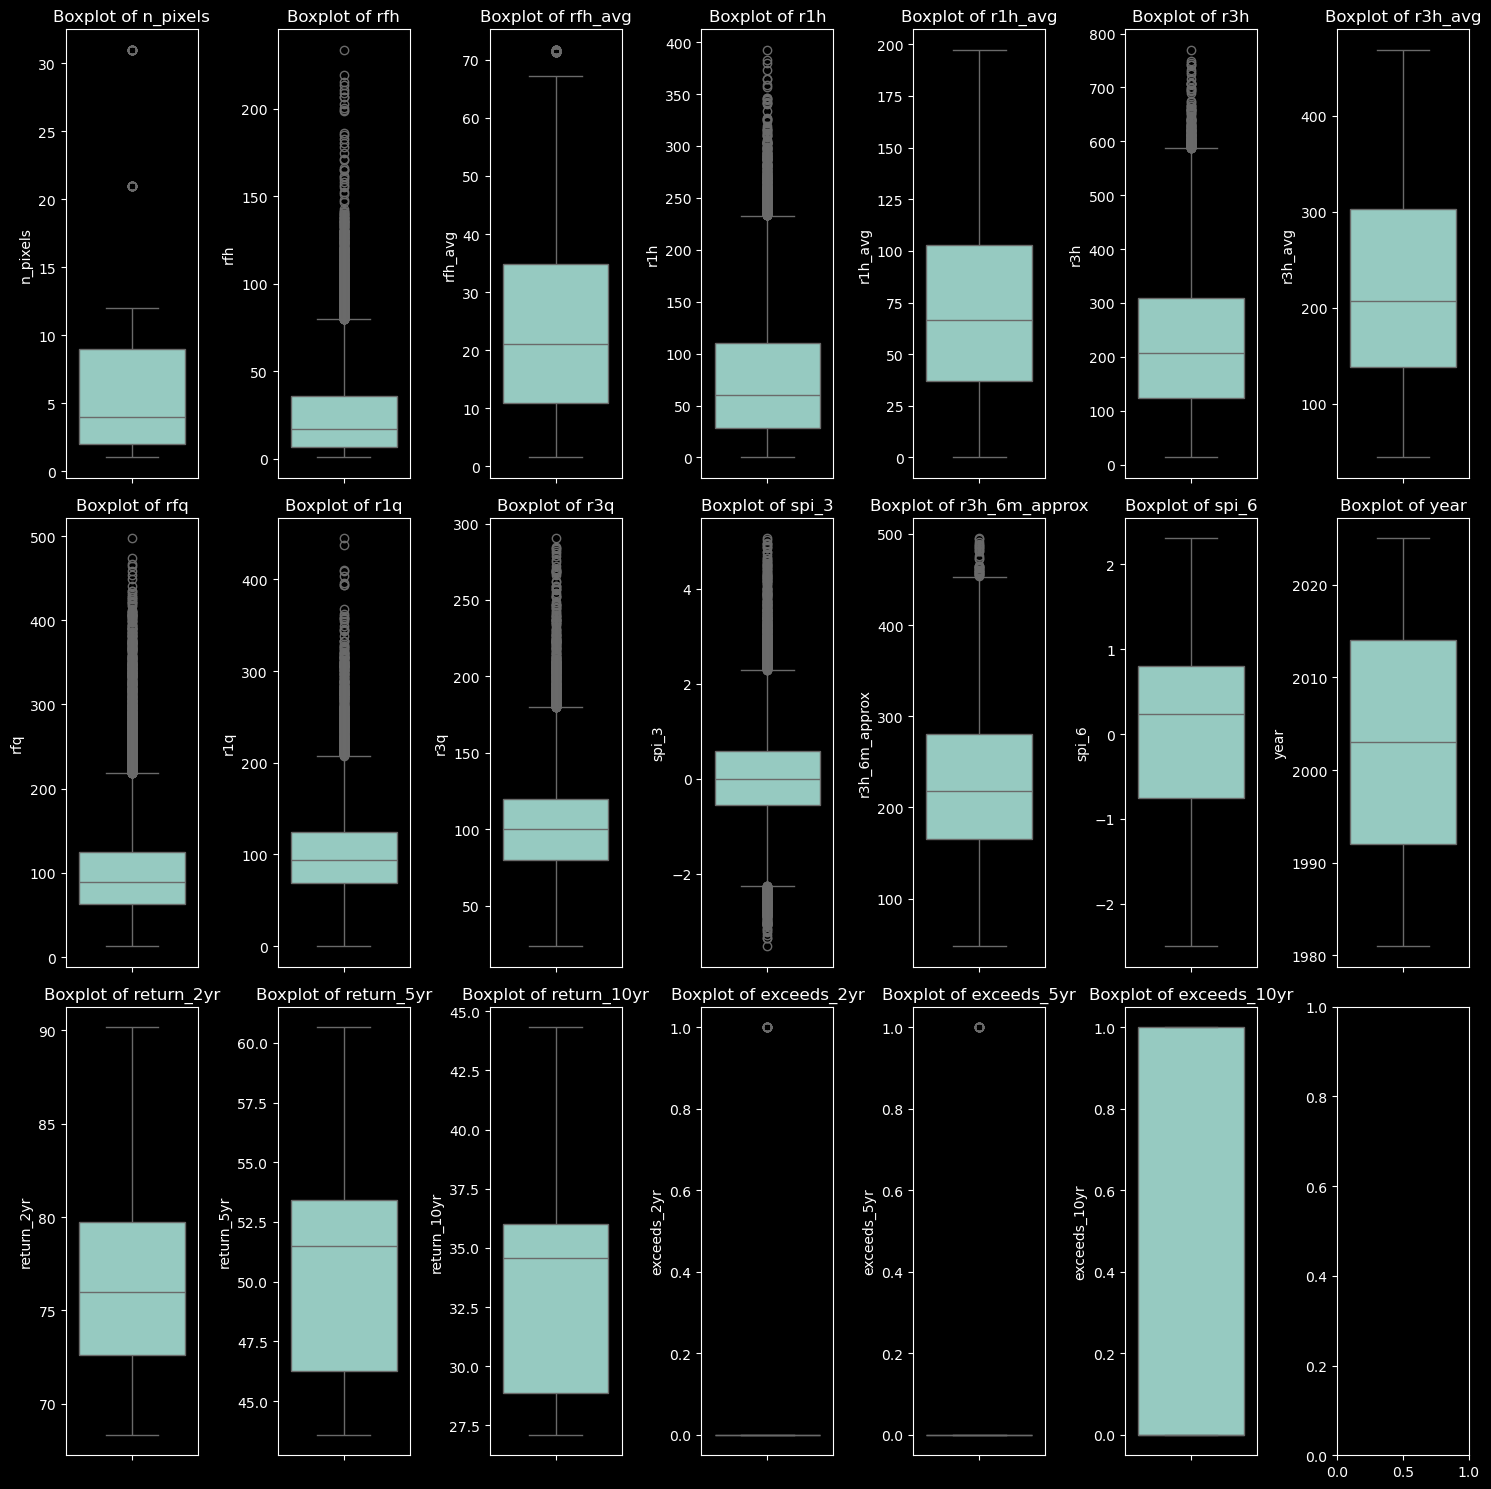

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================== 1. Visualize Outliers with Box Plots ===================
# Plotting box plots for all key columns to detect visual outliers
fig, axes = plt.subplots(3,7, figsize=(15, 15))  # Adjusted layout to fit all columns

# List of columns to check for outliers
columns = ['n_pixels', 'rfh', 'rfh_avg',
       'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q', 
       'spi_3', 'r3h_6m_approx', 'spi_6', 'year',
       'return_2yr', 'return_5yr', 'return_10yr', 'exceeds_2yr', 'exceeds_5yr',
       'exceeds_10yr']

# Create box plots
for i, col in enumerate(columns):
    sns.boxplot(rain_acc[col], ax=axes[i//7, i%7])  # Adjust indexing to fit the new subplot layout
    axes[i//7, i%7].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [44]:
rain_acc.columns

Index(['date', 'adm_level', 'adm_id', 'PCODE', 'Name', 'Municipality',
       'n_pixels', 'rfh', 'rfh_avg', 'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq',
       'r1q', 'r3q', 'version', 'spi_3', 'r3h_6m_approx', 'spi_6', 'year',
       'return_2yr', 'return_5yr', 'return_10yr', 'exceeds_2yr', 'exceeds_5yr',
       'exceeds_10yr'],
      dtype='object')

In [43]:
# ================== 2. IQR Method to Detect Outliers ======================
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = rain_acc[columns].quantile(0.25)
Q3 = rain_acc[columns].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers: Values outside the lower and upper bounds are considered outliers
outliers = ((rain_acc[columns] < lower_bound) | (rain_acc[columns] > upper_bound))

# Print the number of outliers detected for each column
print("\nOutliers detected in each column:")
print(outliers.sum())


KeyError: "['rfh_lag_1', 'rfh_lag_3', 'r1q_lag_1', 'month', 'dekad_of_month', 'sin_month', 'cos_month', 'r3h_6m_ma', 'r3h_12m_ma'] not in index"

In [ ]:
# Check for any missing values in the dataset
# This will show the count of NaN values in each column
missing_values = rainfall_data.isnull().sum()

# Conclusion: if there are no missing values, print a confirmation message
if missing_values.sum() == 0:
    print("No missing values in the data.")
else:
    print(f"Missing values found:\n{missing_values}")

Missing values found:
date                    0
adm_level               0
adm_id                  0
PCODE                   0
n_pixels                0
rfh                     0
rfh_avg                 0
r1h                     0
r1h_avg                 0
r3h                     0
r3h_avg                 0
rfq                     0
r1q                     0
r3q                     0
version                 0
rfh_lag_1             225
rfh_lag_3             675
r1q_lag_1             225
month                   0
dekad_of_month          0
is_rainy_season         0
sin_month               0
cos_month               0
drought_flag            0
high_rainfall_flag      0
r3h_6m_ma               0
r3h_12m_ma              0
spi_3                   0
spi_6                   0
dtype: int64


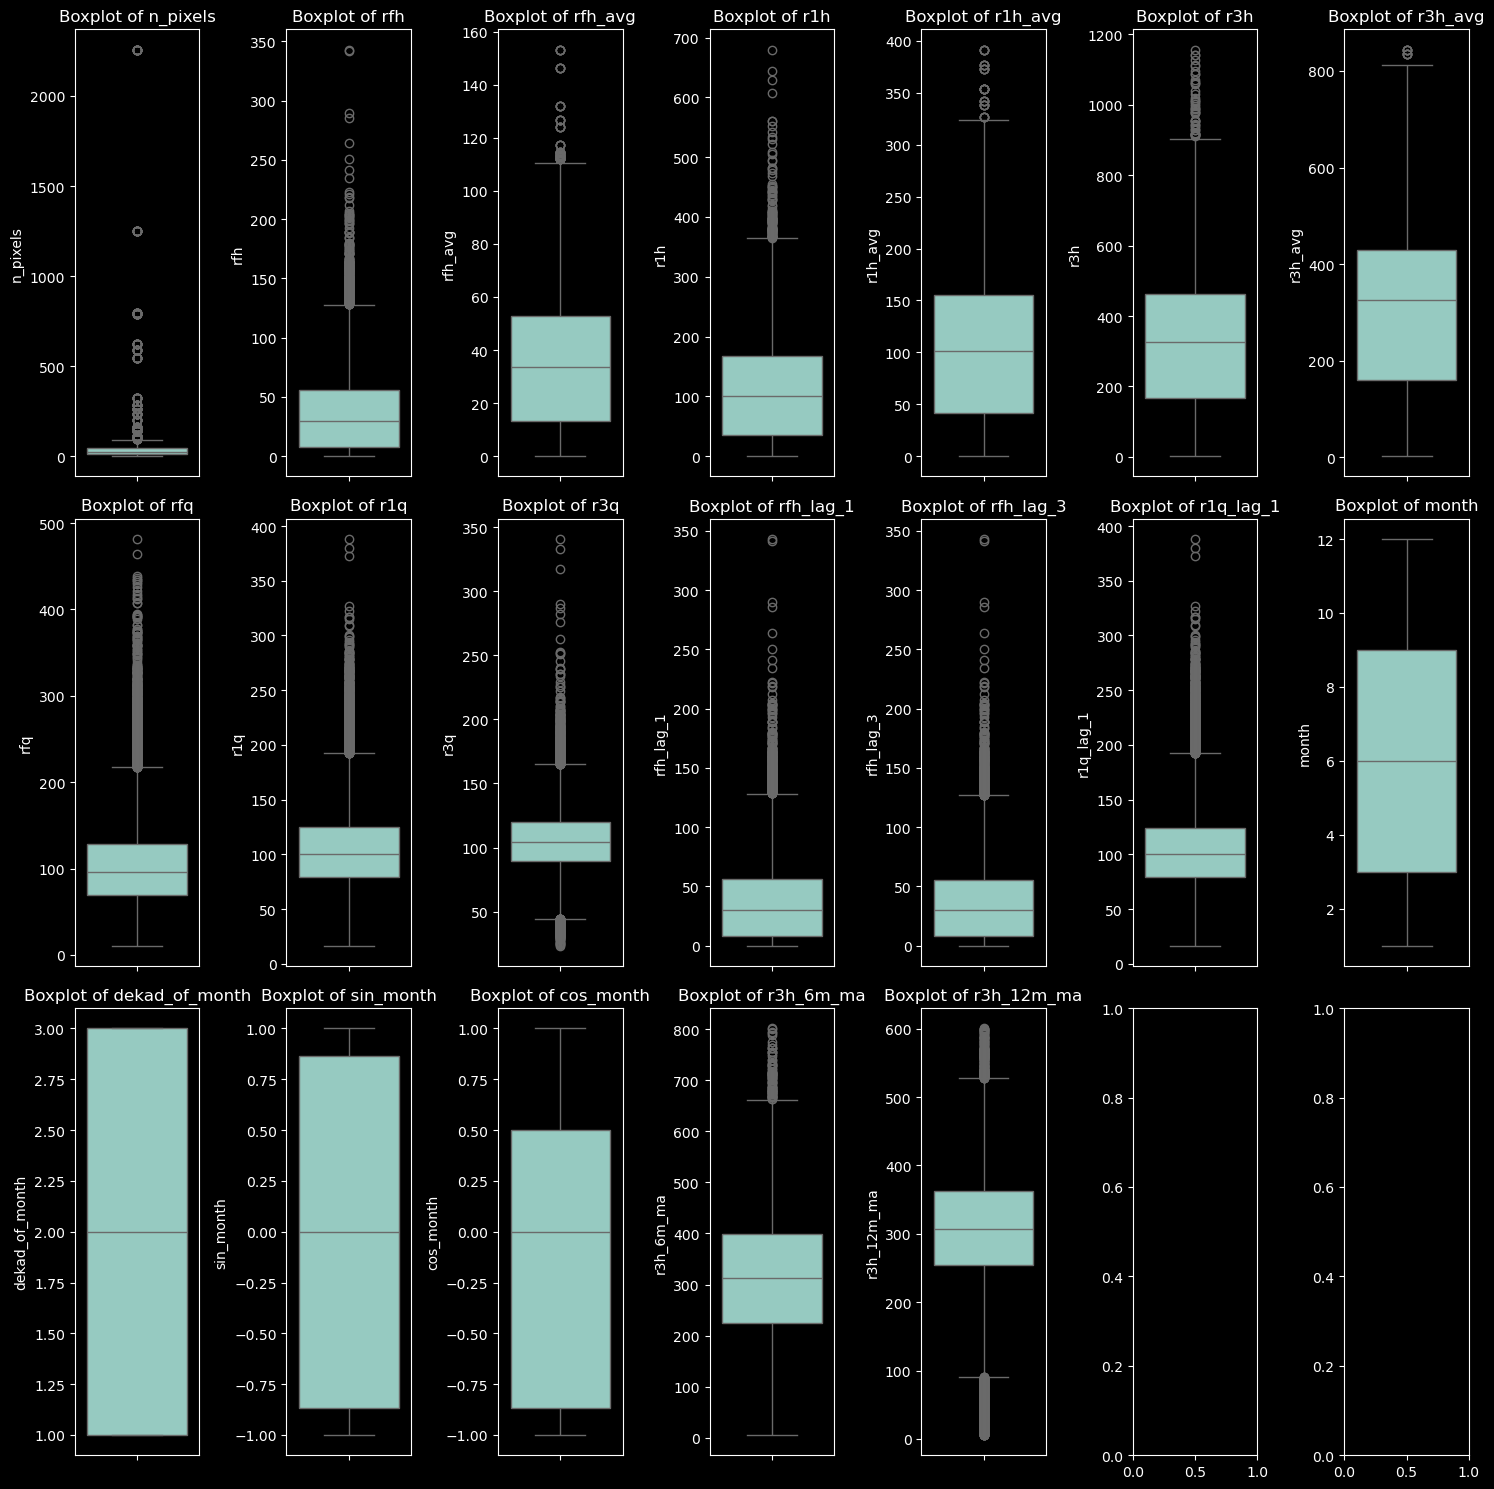

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# ================== 1. Visualize Outliers with Box Plots ===================
# Plotting box plots for all key columns to detect visual outliers
fig, axes = plt.subplots(3,7, figsize=(15, 15))  # Adjusted layout to fit all columns

# List of columns to check for outliers
columns = ['n_pixels', 'rfh', 'rfh_avg',
       'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q',
       'rfh_lag_1', 'rfh_lag_3', 'r1q_lag_1', 'month', 'dekad_of_month', 'sin_month', 'cos_month', 'r3h_6m_ma', 'r3h_12m_ma']

# Create box plots
for i, col in enumerate(columns):
    sns.boxplot(rainfall_data[col], ax=axes[i//7, i%7])  # Adjust indexing to fit the new subplot layout
    axes[i//7, i%7].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
# ================== 2. IQR Method to Detect Outliers ======================
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = rainfall_data[columns].quantile(0.25)
Q3 = rainfall_data[columns].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers: Values outside the lower and upper bounds are considered outliers
outliers = ((rainfall_data[columns] < lower_bound) | (rainfall_data[columns] > upper_bound))

# Print the number of outliers detected for each column
print("\nOutliers detected in each column:")
print(outliers.sum())



Outliers detected in each column:
n_pixels          4200
rfh                567
rfh_avg             65
r1h                108
r1h_avg             40
r3h                 46
r3h_avg             10
rfq               1387
r1q               1101
r3q                987
rfh_lag_1          553
rfh_lag_3          523
r1q_lag_1         1116
month                0
dekad_of_month       0
sin_month            0
cos_month            0
r3h_6m_ma           77
r3h_12m_ma        1466
dtype: int64


In [ ]:
# Check for any missing values in the dataset
# This will show the count of NaN values in each column
missing_values = rainfall_data.isnull().sum()

# Conclusion: if there are no missing values, print a confirmation message
if missing_values.sum() == 0:
    print("No missing values in the data.")
else:
    print(f"Missing values found:\n{missing_values}")

Missing values found:
date                    0
adm_level               0
adm_id                  0
PCODE                   0
n_pixels                0
rfh                     0
rfh_avg                 0
r1h                     0
r1h_avg                 0
r3h                     0
r3h_avg                 0
rfq                     0
r1q                     0
r3q                     0
version                 0
rfh_lag_1             225
rfh_lag_3             675
r1q_lag_1             225
month                   0
dekad_of_month          0
is_rainy_season         0
sin_month               0
cos_month               0
drought_flag            0
high_rainfall_flag      0
r3h_6m_ma               0
r3h_12m_ma              0
spi_3                   0
spi_6                   0
dtype: int64
